In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

/tmp/ipykernel_41190/2151744951.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
RESULTS_FILES = [
    ("lab3/search_results_sgd_square-large-training.csv.jsonl", "lab3/search_results_rmsprop_square-large-training.csv.jsonl"),
    ("lab3/search_results_sgd_multimodal-large-training.csv.jsonl", "lab3/search_results_rmsprop_multimodal-large-training.csv.jsonl"),
    ("lab3/search_results_sgd_steps-large-training.csv.jsonl", "lab3/search_results_rmsprop_steps-large-training.csv.jsonl")
]

In [3]:
analyse = 2

In [4]:
sgd_df, rmsprop_df = pd.read_json(RESULTS_FILES[analyse][0], lines=True), pd.read_json(RESULTS_FILES[analyse][1], lines=True)

In [5]:
sgd_df_rows = []
for count, row in sgd_df.iterrows():
    params = row["params"]
    current_row_dict = params
    current_row_dict["activation"] = current_row_dict["activation"][0]
    current_row_dict["train_losses"] = row["train_losses"]
    current_row_dict["mse"] = row["mse"][0]
    sgd_df_rows.append(current_row_dict)

sgd_df = pd.DataFrame(sgd_df_rows)
sgd_df.head()

,activation,batch_size,beta,layers,learning_rate,neurons,train_losses,mse
0,relu,10,0.5,1,0.010,10,"[0.08017405450000001, 0.0705911191, 0.06821847...",451.019320
1,relu,10,0.5,1,0.010,15,"[0.07199958320000001, 0.0710195171, 0.07076455...",454.763134
2,relu,10,0.5,1,0.010,30,"[0.0709412462, 0.06939776760000001, 0.06997317...",398.379761
3,relu,10,0.5,1,0.005,10,"[0.07338682960000001, 0.0705937578, 0.06980191...",469.461880
4,relu,10,0.5,1,0.005,15,"[0.0708987518, 0.0707130836, 0.0702333643, 0.0...",462.631651


In [6]:
rmsprop_df_rows = []
for count, row in rmsprop_df.iterrows():
    params = row["params"]
    current_row_dict = params
    current_row_dict["activation"] = current_row_dict["activation"][0]
    current_row_dict["train_losses"] = row["train_losses"]
    current_row_dict["mse"] = row["mse"][0]
    rmsprop_df_rows.append(current_row_dict)

rmsprop_df = pd.DataFrame(rmsprop_df_rows)
rmsprop_df.head()

,activation,batch_size,beta,layers,learning_rate,neurons,train_losses,mse
0,relu,10,0.7,1,0.010,10,"[0.0573753181, 0.050566511, 0.0440387019000000...",271.602702
1,relu,10,0.7,1,0.010,15,"[0.060771181300000005, 0.0506262471, 0.0463783...",282.303151
2,relu,10,0.7,1,0.010,30,"[0.0629943465, 0.07799196600000001, 0.04460748...",309.603453
3,relu,10,0.7,1,0.005,10,"[0.0720605381, 0.06423767870000001, 0.06843198...",449.859657
4,relu,10,0.7,1,0.005,15,"[0.0759763051, 0.0683038484, 0.0671221035, 0.0...",188.923136


In [7]:
sorted_sgd_df = sgd_df.sort_values("mse").reset_index(drop=True)
sorted_sgd_df.head(n=10)

,activation,batch_size,beta,layers,learning_rate,neurons,train_losses,mse
0,relu,10,0.5,4,0.010,30,"[0.0807281052, 0.0617409307, 0.053219218900000...",152.898959
1,relu,10,0.5,3,0.010,30,"[0.0711543944, 0.0661523289, 0.064240243900000...",162.583712
2,relu,10,0.5,4,0.010,10,"[0.0790720651, 0.0671473712, 0.063460918, 0.06...",167.765130
3,relu,30,0.5,4,0.010,15,"[0.1885338154, 0.110302852, 0.0770531528, 0.06...",237.829619
4,relu,10,0.8,4,0.010,30,"[0.0776517177, 0.0697805935, 0.0687731357, 0.0...",252.691449
5,relu,20,0.5,4,0.010,30,"[0.0705618633, 0.0701966178, 0.0653511298, 0.0...",252.906441
6,relu,20,0.5,4,0.010,10,"[0.0774306166, 0.0598072349, 0.055303975000000...",262.233147
7,relu,10,0.8,4,0.005,30,"[0.0735876114, 0.0659921079, 0.0649308709, 0.0...",277.485468
8,relu,20,0.5,3,0.010,15,"[0.0716716346, 0.0699738733, 0.0713506404, 0.0...",277.914493
9,relu,10,0.5,3,0.010,15,"[0.07082000470000001, 0.07081182450000001, 0.0...",280.402721


In [8]:
sorted_sgd_df[sorted_sgd_df["layers"] == 1]

,activation,batch_size,beta,layers,learning_rate,neurons,train_losses,mse
40,relu,10,0.5,1,0.0100,30,"[0.0709412462, 0.06939776760000001, 0.06997317...",398.379761
91,relu,30,0.5,1,0.0100,30,"[0.0708622406, 0.0704336499, 0.0695284992, 0.0...",443.866391
113,relu,10,0.5,1,0.0100,10,"[0.08017405450000001, 0.0705911191, 0.06821847...",451.019320
123,relu,10,0.5,1,0.0100,15,"[0.07199958320000001, 0.0710195171, 0.07076455...",454.763134
124,relu,10,0.9,1,0.0100,30,"[0.07817912390000001, 0.0710734356, 0.06892852...",454.896330
...,...,...,...,...,...,...,...,...
1433,relu,20,0.9,1,0.0001,10,"[3.0393763832, 2.7990762353000003, 2.579820933...",4947.754112
1436,relu,30,0.8,1,0.0001,10,"[3.5075527416, 2.9112549306, 2.4748210428, 2.1...",6125.190308
1437,relu,30,0.9,1,0.0001,10,"[1.8972500031, 1.8596901884, 1.8230896228, 1.7...",9081.464752
1438,relu,50,0.9,1,0.0001,15,"[8.0855215732, 7.3234455145, 6.6516759195, 6.0...",12294.384608


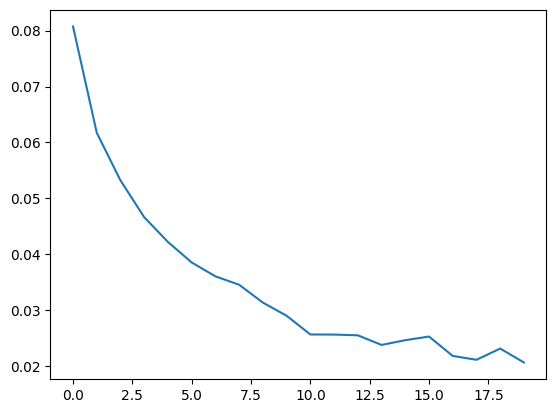

In [9]:
plt.plot(sorted_sgd_df.loc[0, "train_losses"])

In [10]:
sorted_rmsprop_df = rmsprop_df.sort_values("mse").reset_index(drop=True)
sorted_rmsprop_df.head()

,activation,batch_size,beta,layers,learning_rate,neurons,train_losses,mse
0,relu,20,0.8,2,0.005,30,"[0.2630097769, 0.0658580059, 0.0792219546, 0.0...",13.602111
1,relu,20,0.8,4,0.005,15,"[0.049059158500000005, 0.044174693800000005, 0...",19.944578
2,relu,20,0.7,2,0.005,30,"[0.0942707041, 0.047703992, 0.0460035635000000...",23.054190
3,tanh,10,0.7,3,0.005,15,"[0.0832933118, 0.07582421460000001, 0.07651136...",24.680524
4,relu,20,0.8,2,0.010,10,"[0.058769038700000005, 0.0322827232, 0.0247582...",24.774693


In [11]:
sorted_rmsprop_df[sorted_rmsprop_df["layers"] == 2]

,activation,batch_size,beta,layers,learning_rate,neurons,train_losses,mse
0,relu,20,0.8,2,0.0050,30,"[0.2630097769, 0.0658580059, 0.0792219546, 0.0...",13.602111
2,relu,20,0.7,2,0.0050,30,"[0.0942707041, 0.047703992, 0.0460035635000000...",23.054190
4,relu,20,0.8,2,0.0100,10,"[0.058769038700000005, 0.0322827232, 0.0247582...",24.774693
7,relu,30,0.9,2,0.0050,30,"[0.1486059018, 0.0598307672, 0.0301424754, 0.0...",27.825709
8,relu,10,0.8,2,0.0050,15,"[0.0626683873, 0.0489981345, 0.041076289, 0.03...",28.784789
...,...,...,...,...,...,...,...,...
1386,tanh,20,0.9,2,0.0100,15,"[0.07523873760000001, 0.0768099807, 0.08436515...",573.463410
1390,tanh,10,0.9,2,0.0050,30,"[0.0813982862, 0.0751632949, 0.0713300243, 0.0...",583.584756
1398,tanh,30,0.7,2,0.0010,30,"[0.0890040794, 0.0770319193, 0.0726859527, 0.0...",591.563961
1404,tanh,10,0.8,2,0.0050,15,"[0.0783700215, 0.0722639237, 0.0763352723, 0.0...",612.452861


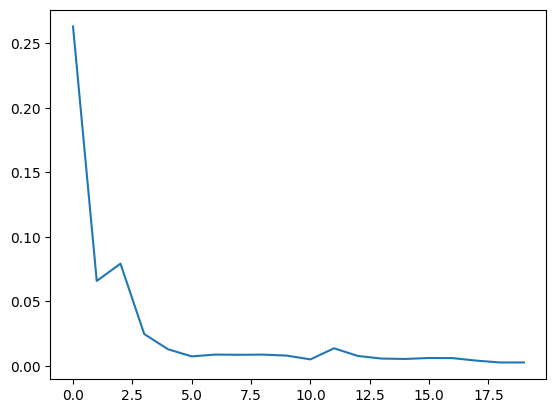

In [12]:
plt.plot(sorted_rmsprop_df.loc[0, "train_losses"])

In [13]:
concat_sgd_df = sgd_df[["learning_rate", "mse", "train_losses"]]
concat_sgd_df["optim"] = "sgd"

concat_rmsprop_df = rmsprop_df[["learning_rate", "mse", "train_losses"]]
concat_rmsprop_df["optim"] = "rmsprop"


results_df = pd.concat([
    concat_sgd_df,
    concat_rmsprop_df
])

/tmp/ipykernel_41190/2284528901.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  concat_sgd_df["optim"] = "sgd"
/tmp/ipykernel_41190/2284528901.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  concat_rmsprop_df["optim"] = "rmsprop"


In [14]:
res2_df = results_df.groupby(["optim", "learning_rate"]).agg({"mse": "min"}).reset_index().set_index(["optim", "learning_rate", "mse"]).join(
    results_df.set_index(["optim", "learning_rate", "mse"])
).reset_index()
res2_df

,optim,learning_rate,mse,train_losses
0,rmsprop,0.0001,98.754076,"[0.0661850632, 0.0624063183, 0.0631399923, 0.0..."
1,rmsprop,0.0005,38.320690,"[0.059376800300000004, 0.0393190143, 0.0291202..."
2,rmsprop,0.0010,33.895254,"[0.0722568033, 0.07058453890000001, 0.06979894..."
3,rmsprop,0.0050,13.602111,"[0.2630097769, 0.0658580059, 0.0792219546, 0.0..."
4,rmsprop,0.0100,24.774693,"[0.058769038700000005, 0.0322827232, 0.0247582..."
5,sgd,0.0001,472.625668,"[0.1844551157, 0.0763678481, 0.0706323406, 0.0..."
6,sgd,0.0005,424.393197,"[0.0710310011, 0.0688283697, 0.0680011492, 0.0..."
7,sgd,0.0010,416.675025,"[0.0743688316, 0.0702630445, 0.0692169417, 0.0..."
8,sgd,0.0050,277.485468,"[0.0735876114, 0.0659921079, 0.0649308709, 0.0..."
9,sgd,0.0100,152.898959,"[0.0807281052, 0.0617409307, 0.053219218900000..."


In [15]:
res2_df.train_losses.apply(len).unique()

array([20])

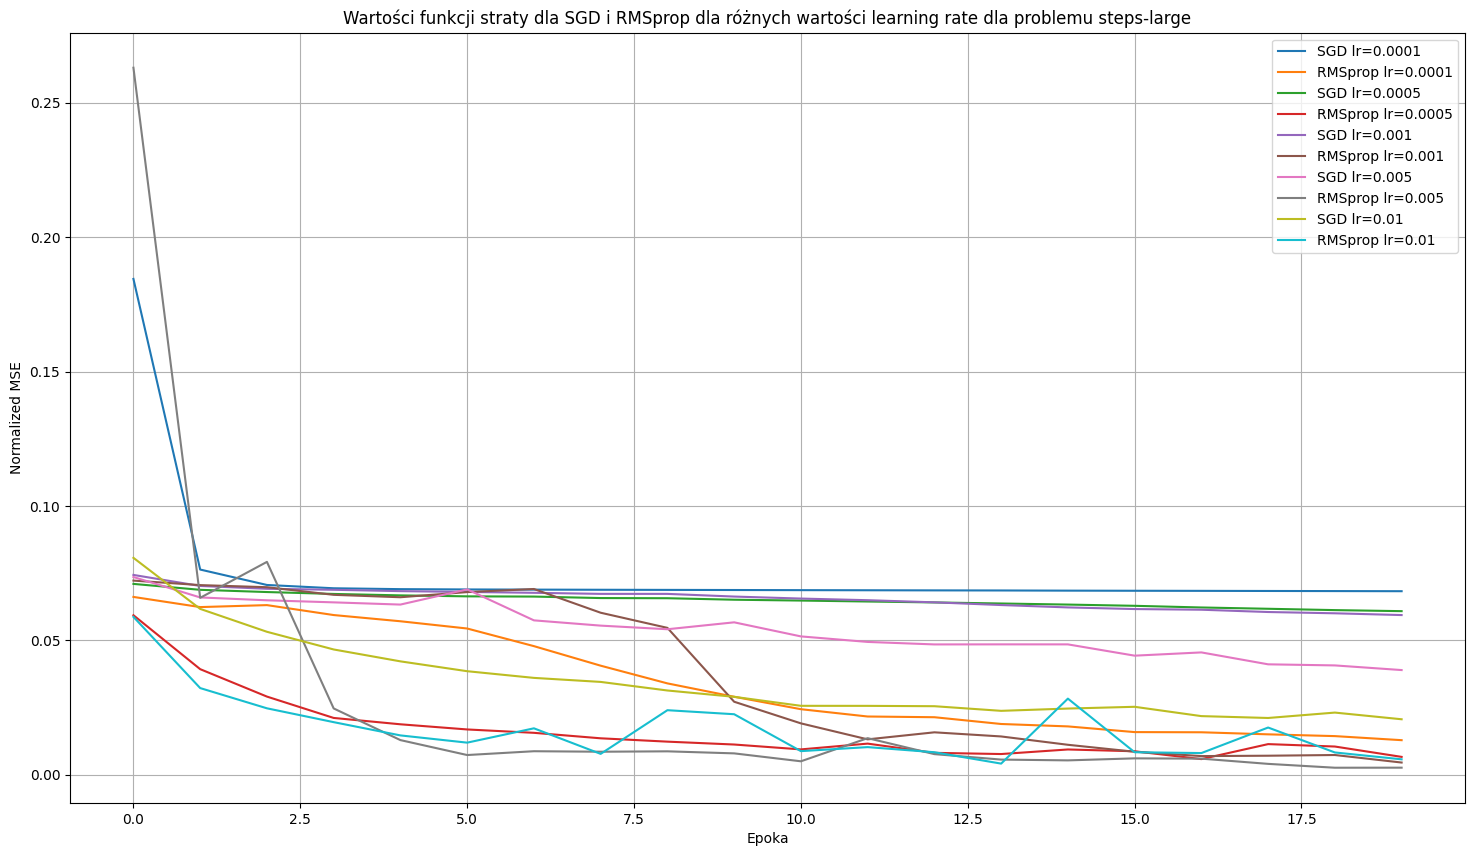

In [16]:
sgd_data = res2_df[res2_df['optim'] == 'sgd']
rmsprop_data = res2_df[res2_df['optim'] == 'rmsprop']

# Plotting
for lr in res2_df['learning_rate'].unique():
    sgd_lr_data = sgd_data[sgd_data['learning_rate'] == lr]
    rmsprop_lr_data = rmsprop_data[rmsprop_data['learning_rate'] == lr]

    # plt.figure(figsize=(10, 6))
    # plt.plot(sgd_lr_data['train_losses'].explode("train_losses").reset_index(drop=True), label=f"SGD MSE={float(sgd_lr_data['mse'])}")
    # plt.plot(rmsprop_lr_data['train_losses'].explode("train_losses").reset_index(drop=True), label=f"RMSprop MSE={float(rmsprop_lr_data['mse'])}")
    # plt.title(f'Wartość funkcji straty dla SGD i RMSprop z learning rat\'em = {lr}')
    # plt.xlabel('Epoka')
    # plt.ylabel('Normalized MSE')
    # plt.legend()
    # plt.grid(True)
    # plt.show()

plt.figure(figsize=(18, 10))
for lr in res2_df['learning_rate'].unique():
    sgd_lr_data = sgd_data[sgd_data['learning_rate'] == lr]
    rmsprop_lr_data = rmsprop_data[rmsprop_data['learning_rate'] == lr]

    plt.plot(sgd_lr_data['train_losses'].explode("train_losses").reset_index(drop=True), label=f"SGD lr={lr}")
    plt.plot(rmsprop_lr_data['train_losses'].explode("train_losses").reset_index(drop=True), label=f"RMSprop lr={lr}")

plt.title('Wartości funkcji straty dla SGD i RMSprop dla różnych wartości learning rate dla problemu steps-large')
plt.xlabel('Epoka')
plt.ylabel('Normalized MSE')
plt.legend()
plt.grid(True)
plt.show()

In [17]:
merged_df = pd.concat([sgd_df, rmsprop_df])

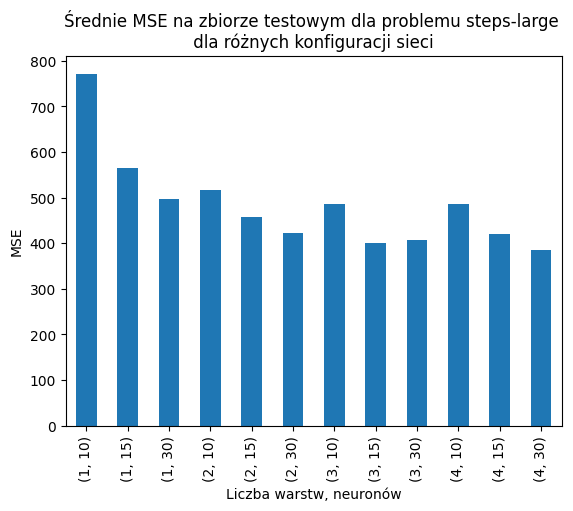

In [18]:
merged_df[["neurons", "layers", "mse"]].groupby(["layers", "neurons"]).agg({"mse": "mean"}).plot(kind="bar", legend=False)
plt.title("Średnie MSE na zbiorze testowym dla problemu steps-large \n dla różnych konfiguracji sieci ")
plt.xlabel("Liczba warstw, neuronów")
plt.ylabel("MSE")
plt.show()